# Name: Jay Rambhiya

# Git-Hub Username : jay-rambhiya

# USC ID: #2219880371

In [3]:
import logging
import os
import shutil
import warnings
from pathlib import Path

import Augmentor as augmentor
import keras
from keras import layers

warnings.filterwarnings('ignore')

In [4]:
# Logging configuration
logging.basicConfig(level=logging.INFO,
                    datefmt='%H:%M:%S',
                    format='%(asctime)s | %(levelname)-5s | %(module)-15s | %(message)s')

IMAGE_SIZE = (
    299, 299)  # All images contained in this dataset are 299x299 (originally, to match Inception v3 input size)
SEED = 17  # Random seed for reproducibility (where possible) 

# Head directory containing all image subframes. Update with the relative path of your data directory
data_head_dir = Path('./data')

# Find all subframe directories
subdirs = [Path(subdir.stem) for subdir in data_head_dir.iterdir() if subdir.is_dir()]
src_image_ids = ['_'.join(a_path.name.split('_')[:3]) for a_path in subdirs]

# 1 (b) Data Exploration and Pre-processing

# 1 (c)Training CNN + MLP

In [12]:

# read all the filenames from train_source_images.txt
with open('./train_source_images.txt', 'r') as f:
    train_source_images_names = [line.strip() for line in f.readlines()]

# read all the folders names in data/ that start with the names in train_source_images_names 
train_source_images_folders = []
for starts_with in train_source_images_names:
    train_source_images_folders.extend([folder for folder in os.listdir('./data') if folder.startswith(starts_with)])

# print(train_source_images_folders)


# now find corresponding labels for each folder in the train_source_images_folders
train_source = []

for folder in train_source_images_folders:
    # the name of the folder inside data/tiles is the label of the imag
    # go to data/folder/tiles and get the name of the folder inside

    # get the name of the folder inside data/folder/tiles which does not start with .
    for label in os.listdir('./data/' + folder + '/tiles'):
        if not label.startswith('.'):
            train_source.append((folder, label))

print(train_source)

# do the same for val_source_images.txt
with open('./val_source_images.txt', 'r') as f:
    val_source_images_names = [line.strip() for line in f.readlines()]

val_source_images_folders = []
for starts_with in val_source_images_names:
    val_source_images_folders.extend([folder for folder in os.listdir('./data') if folder.startswith(starts_with)])

val_source = []

for folder in val_source_images_folders:
    for label in os.listdir('./data/' + folder + '/tiles'):
        if not label.startswith('.'):
            val_source.append((folder, label))

print(val_source)

# create a new directory to save the augmented images and labels
augmented_training_dir = Path('./augmented_training_data')
# if the directory already exists, delete it and create a new one
if augmented_training_dir.exists():
    shutil.rmtree(augmented_training_dir)
augmented_training_dir.mkdir(parents=True, exist_ok=True)

#create subdirectories for frost and background
frost_dir = augmented_training_dir / Path('frost')
frost_dir.mkdir(parents=True, exist_ok=True)
background_dir = augmented_training_dir / Path('background')
background_dir.mkdir(parents=True, exist_ok=True)

source = "/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/"
op = "/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/"
processed = 0

for t in train_source:
    # create a new directory for each image
    label = t[1]
    augmented_training_dir = Path('./augmented_training_data/' + label)

    source_dir = Path(source + t[0] + '/tiles/' + label + '/')
    print(source_dir)
    # how many images in the source directory
    print('number of images in the source directory:', len(os.listdir(source_dir)))

    processed += len(os.listdir(source_dir))
    pipeline = augmentor.Pipeline(source_dir, output_directory=op)
    pipeline.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    pipeline.zoom(probability=0.5, min_factor=1.1, max_factor=1.6)
    pipeline.crop_random(probability=0.5, percentage_area=0.9)
    pipeline.flip_left_right(probability=0.5)
    pipeline.flip_top_bottom(probability=0.5)
    pipeline.random_contrast(probability=0.5, min_factor=0.75, max_factor=1.5)
    pipeline.random_brightness(probability=0.5, min_factor=0.75, max_factor=1.5)
    pipeline.sample(len(os.listdir(source_dir)))

[('ESP_018002_1820_0_5120_20480_25600', 'background'), ('ESP_018002_1820_35840_40960_20480_25600', 'background'), ('ESP_018002_1820_5120_10240_5120_10240', 'background'), ('ESP_018002_1820_40960_46080_25600_29510', 'background'), ('ESP_018002_1820_5120_10240_20480_25600', 'background'), ('ESP_018002_1820_51200_56320_5120_10240', 'background'), ('ESP_018263_2230_20480_25600_0_5120', 'background'), ('ESP_018263_2230_40960_46080_15360_18186', 'background'), ('ESP_018751_2230_0_5120_0_5120', 'background'), ('ESP_018751_2230_20480_25600_10240_15360', 'background'), ('ESP_018828_2445_5120_10240_0_5120', 'background'), ('ESP_018828_2445_20480_25600_10240_15360', 'background'), ('ESP_018828_2445_20480_25600_5120_10240', 'background'), ('ESP_018828_2445_5120_10240_15360_20480', 'background'), ('ESP_018828_2445_25600_30720_15360_20480', 'background'), ('ESP_018828_2445_5120_10240_10240_15360', 'background'), ('ESP_018951_1205_0_5120_0_5120', 'frost'), ('ESP_018951_1205_15360_20480_0_5120', 'fros

/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_0_5120_20480_25600/tiles/background
number of images in the source directory: 32
Initialised with 32 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280CB78D0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_35840_40960_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28104A550>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_5120_10240_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x11D7041D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_40960_46080_25600_29510/tiles/background
number of images in the source directory: 30
Initialised with 30 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283431C10>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_5120_10240_20480_25600/tiles/background
number of images in the source directory: 43
Initialised with 43 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2824A6750>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018002_1820_51200_56320_5120_10240/tiles/background
number of images in the source directory: 49
Initialised with 49 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283488E90>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018263_2230_20480_25600_0_5120/tiles/background
number of images in the source directory: 131
Initialised with 131 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28346E610>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018263_2230_40960_46080_15360_18186/tiles/background
number of images in the source directory: 126
Initialised with 126 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x169EA30D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018751_2230_0_5120_0_5120/tiles/background
number of images in the source directory: 210
Initialised with 210 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283450950>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018751_2230_20480_25600_10240_15360/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28104AE10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_5120_10240_0_5120/tiles/background
number of images in the source directory: 221
Initialised with 221 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281118550>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_20480_25600_10240_15360/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283150150>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_20480_25600_5120_10240/tiles/background
number of images in the source directory: 269
Initialised with 269 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280C53150>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_5120_10240_15360_20480/tiles/background
number of images in the source directory: 254
Initialised with 254 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834A7050>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_25600_30720_15360_20480/tiles/background
number of images in the source directory: 186
Initialised with 186 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282881810>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018828_2445_5120_10240_10240_15360/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280CCC490>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018951_1205_0_5120_0_5120/tiles/frost
number of images in the source directory: 925
Initialised with 925 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280D76750>: 100%|█| 9


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018951_1205_15360_20480_0_5120/tiles/frost
number of images in the source directory: 640
Initialised with 640 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28111E750>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018951_1205_5120_10240_0_5120/tiles/frost
number of images in the source directory: 935
Initialised with 935 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28349A850>: 100%|█| 9


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_018951_1205_10240_15360_0_5120/tiles/frost
number of images in the source directory: 765
Initialised with 765 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2810CE410>: 100%|█| 7


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_15360_20480_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283817F90>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_25600_30720_0_5120/tiles/background
number of images in the source directory: 13
Initialised with 13 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834E7290>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_10240_15360_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283150B10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_25600_30720_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281168FD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_15360_20480_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28388CA10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_0_5120_20480_25600/tiles/background
number of images in the source directory: 54
Initialised with 54 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283559A10>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019251_2385_46080_51200_30720_33558/tiles/background
number of images in the source directory: 19
Initialised with 19 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283150250>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_25600_30720_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281063410>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_20480_25600_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28347B850>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_30720_35840_25600_29008/tiles/background
number of images in the source directory: 38
Initialised with 38 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282881FD0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_30720_35840_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283569D50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_30720_35840_0_5120/tiles/background
number of images in the source directory: 11
Initialised with 11 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281142210>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019459_2185_25600_30720_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x155E52650>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019636_1300_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 37
Initialised with 37 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282881CD0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019636_1300_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 96
Initialised with 96 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28351F190>: 100%|█| 9


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019636_1300_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 140
Initialised with 140 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281018A10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019636_1300_35840_40960_5120_10240/tiles/frost
number of images in the source directory: 138
Initialised with 138 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28352C4D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019781_1300_25600_30720_10240_15141/tiles/frost
number of images in the source directory: 1
Initialised with 1 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28110E290>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019781_1300_0_5120_5120_10240/tiles/frost
number of images in the source directory: 56
Initialised with 56 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172301D10>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019781_1300_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 5
Initialised with 5 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28353F890>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_019781_1300_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 12
Initialised with 12 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x155E52650>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_020415_1195_10240_15360_0_5120/tiles/frost
number of images in the source directory: 202
Initialised with 202 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2824A6750>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_020415_1195_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 259
Initialised with 259 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834AAD10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_020415_1195_0_5120_5120_10240/tiles/frost
number of images in the source directory: 262
Initialised with 262 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281104B50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_020415_1195_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 270
Initialised with 270 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2833DD5D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_022508_2385_5120_10240_10240_15360/tiles/frost
number of images in the source directory: 217
Initialised with 217 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283817590>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024291_2445_35840_40960_15360_20480/tiles/frost
number of images in the source directory: 176
Initialised with 176 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280CEC1D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024291_2445_51200_56320_15360_20480/tiles/frost
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2826527D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024291_2445_20480_25600_10240_15360/tiles/frost
number of images in the source directory: 256
Initialised with 256 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172541FD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024370_2445_0_5120_0_5120/tiles/frost
number of images in the source directory: 158
Initialised with 158 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x15570DF50>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024370_2445_56320_61440_10240_15360/tiles/frost
number of images in the source directory: 214
Initialised with 214 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282BA2F90>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_024370_2445_30720_35840_5120_10240/tiles/frost
number of images in the source directory: 180
Initialised with 180 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x15320C850>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_027706_1300_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 138
Initialised with 138 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x157AE1ED0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_027706_1300_25600_30720_5120_10240/tiles/frost
number of images in the source directory: 101
Initialised with 101 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2828814D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_027706_1300_30720_35840_5120_10240/tiles/frost
number of images in the source directory: 75
Initialised with 75 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281139B50>: 100%|█| 7


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_027706_1300_15360_20480_0_5120/tiles/frost
number of images in the source directory: 111
Initialised with 111 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2835422D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_028733_2230_61440_66560_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28341D8D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_028733_2230_15360_20480_20480_25600/tiles/background
number of images in the source directory: 59
Initialised with 59 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2824A6810>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_028799_2230_10240_15360_0_5120/tiles/background
number of images in the source directory: 201
Initialised with 201 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28113B6D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_028799_2230_20480_25600_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28347AA50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_028799_2230_25600_30720_0_5120/tiles/background
number of images in the source directory: 102
Initialised with 102 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282B99E10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_031989_2385_0_5120_0_5120/tiles/frost
number of images in the source directory: 157
Initialised with 157 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x1553E5CD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_032345_2385_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 253
Initialised with 253 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x176FBEA10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_032556_2385_20480_25600_0_5120/tiles/frost
number of images in the source directory: 101
Initialised with 101 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282F5FBD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_032785_2450_0_5120_0_5120/tiles/frost
number of images in the source directory: 157
Initialised with 157 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28340FA10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_032912_2385_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 48
Initialised with 48 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28340F890>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_032930_2450_20480_25600_25600_30720/tiles/frost
number of images in the source directory: 45
Initialised with 45 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28347A550>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_033141_2450_61440_66560_20480_25600/tiles/frost
number of images in the source directory: 58
Initialised with 58 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282BA2B50>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_033141_2450_5120_10240_10240_15360/tiles/frost
number of images in the source directory: 56
Initialised with 56 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281018090>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_15360_20480_10240_15360/tiles/background
number of images in the source directory: 235
Initialised with 235 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172542210>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_0_5120_10240_15360/tiles/background
number of images in the source directory: 116
Initialised with 116 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11B6BFF50>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_5120_10240_0_5120/tiles/background
number of images in the source directory: 234
Initialised with 234 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2838527D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_10240_15360_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28264B810>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_15360_20480_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28110D710>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_35840_38175_15360_16935/tiles/background
number of images in the source directory: 15
Initialised with 15 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283483C10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_10240_15360_10240_15360/tiles/background
number of images in the source directory: 199
Initialised with 199 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282B99F90>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_035958_2385_25600_30720_10240_15360/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28111ADD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036357_1255_0_5120_0_5120/tiles/frost
number of images in the source directory: 783
Initialised with 783 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x1725165D0>: 100%|█| 7


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036357_1255_10240_15360_0_5120/tiles/frost
number of images in the source directory: 704
Initialised with 704 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172538510>: 100%|█| 7


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036357_1255_15360_20480_0_5120/tiles/frost
number of images in the source directory: 137
Initialised with 137 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2810EA7D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036357_1255_5120_10240_0_5120/tiles/frost
number of images in the source directory: 42
Initialised with 42 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281080650>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_25600_30720_10240_15360/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x14E5E8110>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_30720_32804_5120_10240/tiles/background
number of images in the source directory: 94
Initialised with 94 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281061E10>: 100%|█| 9


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_0_5120_5120_10240/tiles/background
number of images in the source directory: 245
Initialised with 245 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282652810>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_5120_10240_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28343ADD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_30720_32804_15360_17718/tiles/background
number of images in the source directory: 14
Initialised with 14 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282BA27D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_30720_32804_10240_15360/tiles/background
number of images in the source directory: 58
Initialised with 58 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x17277F3D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_036752_2440_25600_30720_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2834264D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_038058_1205_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2811418D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_038058_1205_0_5120_5120_10240/tiles/frost
number of images in the source directory: 242
Initialised with 242 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283425FD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_038058_1205_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 175
Initialised with 175 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x1722F0A10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_038058_1205_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283433F10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_039175_1200_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 256
Initialised with 256 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17253FE50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_039175_1200_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 191
Initialised with 191 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280D63290>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_039175_1200_0_5120_0_5120/tiles/frost
number of images in the source directory: 177
Initialised with 177 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281080BD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_039175_1200_20480_25600_10240_14496/tiles/frost
number of images in the source directory: 41
Initialised with 41 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28107D290>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_039888_2385_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 132
Initialised with 132 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x17253FF50>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040099_2385_25600_28910_0_5120/tiles/frost
number of images in the source directory: 42
Initialised with 42 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28110CD10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040666_2385_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 208
Initialised with 208 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281106BD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040877_2385_5120_10240_0_5120/tiles/frost
number of images in the source directory: 170
Initialised with 170 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281080BD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_5120_10240_10240_11162/tiles/background
number of images in the source directory: 12
Initialised with 12 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281111B50>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_0_5120_5120_10240/tiles/background
number of images in the source directory: 249
Initialised with 249 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28107E9D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_0_5120_0_5120/tiles/background
number of images in the source directory: 221
Initialised with 221 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281111C50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_10240_13543_10240_11162/tiles/background
number of images in the source directory: 15
Initialised with 15 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281142010>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_10240_13543_0_5120/tiles/background
number of images in the source directory: 124
Initialised with 124 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2834BE510>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_040959_1355_10240_13543_5120_10240/tiles/background
number of images in the source directory: 144
Initialised with 144 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281074850>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_041233_2385_40960_46080_15360_20480/tiles/frost
number of images in the source directory: 36
Initialised with 36 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834A9210>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_041444_2385_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280D96790>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_46080_51200_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281018150>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_0_5120_15360_20480/tiles/background
number of images in the source directory: 52
Initialised with 52 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280D50150>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_5120_10240_0_5120/tiles/background
number of images in the source directory: 53
Initialised with 53 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281075B50>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_25600_30720_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283427910>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_10240_15360_0_5120/tiles/background
number of images in the source directory: 45
Initialised with 45 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281110E10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_042279_1820_35840_40960_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28348A490>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_15360_20480_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28107DF10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_30720_34926_0_5120/tiles/background
number of images in the source directory: 9
Initialised with 9 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281054850>: 100%|█| 9


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_15360_20480_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283150AD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_20480_25600_20480_23601/tiles/background
number of images in the source directory: 23
Initialised with 23 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283453450>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_10240_15360_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2811406D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_045865_1825_30720_34926_5120_10240/tiles/background
number of images in the source directory: 48
Initialised with 48 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11A927890>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_054143_2230_15360_20480_0_5120/tiles/background
number of images in the source directory: 153
Initialised with 153 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281057350>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_054143_2230_10240_15360_0_5120/tiles/background
number of images in the source directory: 194
Initialised with 194 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172735C10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_055293_2370_0_5120_0_5120/tiles/background
number of images in the source directory: 25
Initialised with 25 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17238C650>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_055293_2370_5120_10240_0_5120/tiles/background
number of images in the source directory: 52
Initialised with 52 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282C3C810>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_055293_2370_20480_25600_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x1722F1190>: 100%|█| 6

/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_055293_2370_20480_25600_5120_10240/tiles/background
number of images in the source directory: 64


Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28110E690>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281142C90>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_25600_30720_0_5120/tiles/frost
number of images in the source directory: 16
Initialised with 16 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281120FD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_15360_20480_0_5120/tiles/frost
number of images in the source directory: 30
Initialised with 30 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28348AC90>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_30720_35840_5120_10240/tiles/frost
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281065490>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_0_5120_10240_15360/tiles/frost
number of images in the source directory: 39
Initialised with 39 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28340F3D0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 46
Initialised with 46 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28343A750>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_057638_2230_25600_30720_20480_25600/tiles/frost
number of images in the source directory: 52
Initialised with 52 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28107D290>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058046_2385_30720_35840_15360_17036/tiles/frost
number of images in the source directory: 57
Initialised with 57 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172303ED0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058710_2450_30720_35840_5120_10240/tiles/frost
number of images in the source directory: 203
Initialised with 203 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28106EA10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058722_2370_5120_10240_0_5120/tiles/frost
number of images in the source directory: 44
Initialised with 44 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28388FE90>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058722_2370_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 49
Initialised with 49 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280C6B0D0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058933_2370_30720_35840_20480_25600/tiles/frost
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282BA2E10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_058933_2370_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 38
Initialised with 38 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28106C1D0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059259_2385_5120_10240_10240_15360/tiles/frost
number of images in the source directory: 153
Initialised with 153 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28346D5D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059277_2450_25600_30720_10240_15360/tiles/frost
number of images in the source directory: 205
Initialised with 205 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2834A91D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059277_2450_0_5120_5120_10240/tiles/frost
number of images in the source directory: 224
Initialised with 224 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28388CE50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059470_2385_15360_20480_10240_15360/tiles/frost
number of images in the source directory: 191
Initialised with 191 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2824A71D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059500_2370_10240_15360_20480_25600/tiles/frost
number of images in the source directory: 57
Initialised with 57 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11B6B8950>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059500_2370_10240_15360_15360_20480/tiles/frost
number of images in the source directory: 38
Initialised with 38 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28106F1D0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059500_2370_5120_10240_15360_20480/tiles/frost
number of images in the source directory: 44
Initialised with 44 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x176A278D0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059500_2370_25600_30720_5120_10240/tiles/frost
number of images in the source directory: 40
Initialised with 40 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281057E10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_059500_2370_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x11A8D3850>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_060055_2450_15360_20480_10240_15360/tiles/frost
number of images in the source directory: 231
Initialised with 231 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281081D90>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_060332_2450_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 4
Initialised with 4 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x1722F2E10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_10240_15360_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x11B6C2690>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_5120_10240_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2838163D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_0_5120_20480_25600/tiles/background
number of images in the source directory: 55
Initialised with 55 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280CEC1D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_15360_20480_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280CEC1D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_0_5120_0_5120/tiles/background
number of images in the source directory: 16
Initialised with 16 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283852B10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_15360_20480_25600_29685/tiles/background
number of images in the source directory: 35
Initialised with 35 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x1722FD0D0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_15360_20480_0_5120/tiles/background
number of images in the source directory: 25
Initialised with 25 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282F82B50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_061741_2435_15360_20480_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281177F50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062177_2370_35840_40353_10240_15360/tiles/background
number of images in the source directory: 47
Initialised with 47 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28106C1D0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062177_2370_35840_40353_5120_10240/tiles/background
number of images in the source directory: 53
Initialised with 53 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28106FFD0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062177_2370_10240_15360_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x1722F9810>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062177_2370_15360_20480_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283817E50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_10240_15360_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281108150>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_0_5120_5120_10240/tiles/background
number of images in the source directory: 29
Initialised with 29 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281062610>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_25600_30720_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281066E50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_15360_20480_0_5120/tiles/background
number of images in the source directory: 28
Initialised with 28 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283489010>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_5120_10240_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28340FD90>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_5120_10240_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2838175D0>: 100%|█| 6

/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_35840_40632_10240_15360/tiles/background
number of images in the source directory: 51


Initialised with 51 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17251BB50>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062521_2450_20480_25600_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28348AED0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062583_2230_15360_20480_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282880C50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_062583_2230_30720_35840_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282E07E50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_065354_2440_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 246
Initialised with 246 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280DBCF50>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_065354_2440_15360_20299_0_5120/tiles/frost
number of images in the source directory: 121
Initialised with 121 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281120C10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066104_2230_51200_56320_15360_20480/tiles/frost
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11CD35890>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066104_2230_56320_61440_20480_25600/tiles/frost
number of images in the source directory: 41
Initialised with 41 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280D42B10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066104_2230_40960_46080_5120_10240/tiles/frost
number of images in the source directory: 56
Initialised with 56 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x1723C31D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066104_2230_10240_15360_15360_20480/tiles/frost
number of images in the source directory: 49
Initialised with 49 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282BA2DD0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066104_2230_25600_30720_15360_20480/tiles/frost
number of images in the source directory: 49
Initialised with 49 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282BA2FD0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066446_2385_15360_20480_0_5120/tiles/frost
number of images in the source directory: 516
Initialised with 516 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2807F2D10>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066476_2370_20480_25600_0_5120/tiles/frost
number of images in the source directory: 59
Initialised with 59 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281106B50>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066476_2370_0_5120_5120_10240/tiles/frost
number of images in the source directory: 248
Initialised with 248 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280D76010>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066805_2440_35840_40960_5120_10240/tiles/frost
number of images in the source directory: 220
Initialised with 220 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x283443E10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066805_2440_10240_15360_0_5120/tiles/frost
number of images in the source directory: 176
Initialised with 176 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x155E52650>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066819_2370_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 220
Initialised with 220 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2834E4B10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066819_2370_35840_40960_10240_15360/tiles/frost
number of images in the source directory: 41
Initialised with 41 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2811427D0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066935_2230_15360_20480_0_5120/tiles/background
number of images in the source directory: 35
Initialised with 35 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28268FE50>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_066935_2230_46080_51200_5120_10240/tiles/background
number of images in the source directory: 42
Initialised with 42 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17253A790>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067084_2450_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 259
Initialised with 259 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2811238D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067216_2450_20480_25600_15360_18135/tiles/frost
number of images in the source directory: 70
Initialised with 70 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172515210>: 100%|█| 7


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_0_5120_0_5120/tiles/background
number of images in the source directory: 29
Initialised with 29 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x176FA7A10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_10240_15360_0_5120/tiles/background
number of images in the source directory: 44
Initialised with 44 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28341CB10>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_5120_10240_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283443C90>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_20480_25600_10240_15360/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280D81ED0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_25600_30720_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28341EC50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067228_1820_15360_20480_0_5120/tiles/background
number of images in the source directory: 36
Initialised with 36 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282880BD0>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067360_2370_51200_56320_5120_10240/tiles/frost
number of images in the source directory: 55
Initialised with 55 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17238E550>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067360_2370_35840_40960_5120_10240/tiles/frost
number of images in the source directory: 47
Initialised with 47 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28341DDD0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067691_2450_35840_40316_15360_20480/tiles/frost
number of images in the source directory: 29
Initialised with 29 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x157AE1ED0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_067691_2450_20480_25600_10240_15360/tiles/frost
number of images in the source directory: 57
Initialised with 57 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282C3D8D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_068046_2370_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 49
Initialised with 49 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x169E83C50>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_068046_2370_20480_25600_0_5120/tiles/frost
number of images in the source directory: 13
Initialised with 13 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280C51DD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_068046_2370_40960_42900_5120_10240/tiles/frost
number of images in the source directory: 6
Initialised with 6 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283440C10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_068362_2440_0_5120_5120_10240/tiles/frost
number of images in the source directory: 218
Initialised with 218 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280C51DD0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_068362_2440_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 247
Initialised with 247 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x282F5EA10>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_069365_2440_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 3
Initialised with 3 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28340FE90>: 100%|█| 3


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071080_2370_35840_37235_5120_10240/tiles/background
number of images in the source directory: 11
Initialised with 11 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172515510>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071080_2370_15360_20480_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28264BDD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071080_2370_10240_15360_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x280D50350>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071080_2370_25600_30720_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11B691CD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_30720_35840_25600_30720/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2807F22D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_25600_30720_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11B67D4D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_0_5120_10240_15360/tiles/background
number of images in the source directory: 40
Initialised with 40 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281140D90>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_25600_30720_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x17253D0D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_15360_20480_15360_20480/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x1727A4FD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_0_5120_15360_20480/tiles/background
number of images in the source directory: 48
Initialised with 48 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281122FD0>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_071635_2450_20480_25600_25600_30720/tiles/background
number of images in the source directory: 52
Initialised with 52 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2811438D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_0_5120_5120_10240/tiles/background
number of images in the source directory: 264
Initialised with 264 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834E4910>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_15360_20480_0_5120/tiles/background
number of images in the source directory: 165
Initialised with 165 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x11A927890>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_5120_10240_5120_10240/tiles/background
number of images in the source directory: 289
Initialised with 289 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172313010>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_10240_15360_10240_13642/tiles/background
number of images in the source directory: 82
Initialised with 82 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x11A927890>: 100%|█| 8


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_25600_28976_5120_10240/tiles/background
number of images in the source directory: 156
Initialised with 156 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28340FCD0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072193_1845_10240_15360_0_5120/tiles/background
number of images in the source directory: 201
Initialised with 201 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282BA2790>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072569_1320_0_5120_5120_10240/tiles/frost
number of images in the source directory: 6
Initialised with 6 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x282B99B10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072569_1320_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 8
Initialised with 8 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2807F2D10>: 100%|█| 8


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_072569_1320_5120_10240_0_5120/tiles/frost
number of images in the source directory: 4
Initialised with 4 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281112290>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_073664_1205_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 65
Initialised with 65 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2810E8BD0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_073664_1205_5120_10240_5120_10240/tiles/frost
number of images in the source directory: 47
Initialised with 47 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172539290>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_073664_1205_0_5120_0_5120/tiles/frost
number of images in the source directory: 10
Initialised with 10 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283438B10>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/ESP_073664_1205_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 68
Initialised with 68 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281102F50>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002033_1325_15360_20480_5120_10240/tiles/frost
number of images in the source directory: 5
Initialised with 5 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281103250>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002033_1325_10240_15360_10240_15360/tiles/frost
number of images in the source directory: 6
Initialised with 6 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x281103C10>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002033_1325_15360_20480_10240_15360/tiles/frost
number of images in the source directory: 6
Initialised with 6 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x172538990>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002033_1325_10240_15360_5120_10240/tiles/frost
number of images in the source directory: 13
Initialised with 13 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x2834BE510>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002904_1255_25600_30720_15360_20480/tiles/frost
number of images in the source directory: 13
Initialised with 13 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x281102650>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002904_1255_20480_25600_5120_10240/tiles/frost
number of images in the source directory: 19
Initialised with 19 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x280CEF0D0>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002904_1255_25600_30720_5120_10240/tiles/frost
number of images in the source directory: 62
Initialised with 62 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x28106F1D0>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_002904_1255_25600_30720_10240_15360/tiles/frost
number of images in the source directory: 45
Initialised with 45 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172301450>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_008120_2465_61440_66560_0_5120/tiles/frost
number of images in the source directory: 28
Initialised with 28 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x11A9257D0>: 100%|█| 2


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_008120_2465_66560_71680_0_5120/tiles/frost
number of images in the source directory: 40
Initialised with 40 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x169E82490>: 100%|█| 4


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_008120_2465_10240_15360_35840_40960/tiles/frost
number of images in the source directory: 5
Initialised with 5 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x2834E51D0>: 100%|█| 5


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_008120_2465_66560_71680_5120_10240/tiles/frost
number of images in the source directory: 82
Initialised with 82 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x28106F910>: 100%|█| 8


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_009721_2370_30720_35840_20480_25600/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172539290>: 100%|█| 6


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_009721_2370_56320_58625_10240_15360/tiles/background
number of images in the source directory: 19
Initialised with 19 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x283151390>: 100%|█| 1


/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/PSP_009721_2370_30720_35840_5120_10240/tiles/background
number of images in the source directory: 64
Initialised with 64 image(s) found.
Output directory set to /Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_training_data/.

Processing <PIL.Image.Image image mode=L size=269x269 at 0x172539290>: 100%|█| 6


In [14]:
# make all images rgb
import cv2

for img in os.listdir('./augmented_training_data'):
    if img.endswith('.png'):
        image = cv2.imread('./augmented_training_data/' + img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite('./augmented_training_data/' + img, image)

# segregate the images in the augmented training set into frost and background based on the name of the image
for img in os.listdir('./augmented_training_data'):
    if img.startswith('frost'):
        shutil.move('./augmented_training_data/' + img, './augmented_training_data/frost')
    elif img.startswith('background'):
        shutil.move('./augmented_training_data/' + img, './augmented_training_data/background')

import os
import tensorflow as tf

max_width = 299
max_height = 299

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    './augmented_training_data',
    color_mode="rgb",
    batch_size=32,
    image_size=(max_height, max_width),
    shuffle=True,
    labels='inferred',
    class_names=None
)

Found 29679 files belonging to 2 classes.


In [15]:
# repeat the same for validation data
augmented_val_dir = Path('./augmented_val_data')
# if the directory already exists, delete it and create a new one
if augmented_val_dir.exists():
    shutil.rmtree(augmented_val_dir)
augmented_val_dir.mkdir(parents=True, exist_ok=True)

#create subdirectories for frost and background
frost_dir = augmented_val_dir / Path('frost')
frost_dir.mkdir(parents=True, exist_ok=True)
background_dir = augmented_val_dir / Path('background')
background_dir.mkdir(parents=True, exist_ok=True)


In [16]:

source = "/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/data/"
op = "/Users/jayrambhiya/Desktop/DSCI 552/Final Project/dataverse_files/dataverse_hirise_v3/augmented_val_data/"

#move the images from data/ to augmented_val_data/ which match with names in val_source_images.txt
val_source_images_folders = []
for starts_with in val_source_images_names:
    val_source_images_folders.extend([folder for folder in os.listdir('./data') if folder.startswith(starts_with)])

# read all validation images from data/ if the folder name matches with the names in val_source_images.txt and move them to augmented_val_data/
for folder in val_source_images_folders:
    #open data/folder/tiles/frost or data/folder/tiles/background and move all images to augmented_val_data/frost or augmented_val_data/background
    for label in os.listdir('./data/' + folder + '/tiles'):
        if not label.startswith('.'):
            for img in os.listdir('./data/' + folder + '/tiles/' + label):
                if img.endswith('.png'):
                    shutil.copy('./data/' + folder + '/tiles/' + label + '/' + img, './augmented_val_data/' + label)



In [17]:

validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    './augmented_val_data',
    color_mode="rgb",
    batch_size=32,
    image_size=(max_height, max_width),
    shuffle=True,
    labels='inferred',
    class_names=None
)




Found 11286 files belonging to 2 classes.


In [21]:
# read Test Data
# repeat the same for validation data
augmented_val_dir = Path('./testing_data')
# if the directory already exists, delete it and create a new one
if augmented_val_dir.exists():
    shutil.rmtree(augmented_val_dir)
augmented_val_dir.mkdir(parents=True, exist_ok=True)

#create subdirectories for frost and background
frost_dir = augmented_val_dir / Path('frost')
frost_dir.mkdir(parents=True, exist_ok=True)
background_dir = augmented_val_dir / Path('background')
background_dir.mkdir(parents=True, exist_ok=True)

# do the same for val_source_images.txt
with open('./test_source_images.txt', 'r') as f:
    val_source_images_names = [line.strip() for line in f.readlines()]
#move the images from data/ to augmented_val_data/ which match with names in val_source_images.txt
val_source_images_folders = []
for starts_with in val_source_images_names:
    val_source_images_folders.extend([folder for folder in os.listdir('./data') if folder.startswith(starts_with)])

# read all validation images from data/ if the folder name matches with the names in val_source_images.txt and move them to augmented_val_data/
for folder in val_source_images_folders:
    #open data/folder/tiles/frost or data/folder/tiles/background and move all images to augmented_val_data/frost or augmented_val_data/background
    for label in os.listdir('./data/' + folder + '/tiles'):
        if not label.startswith('.'):
            for img in os.listdir('./data/' + folder + '/tiles/' + label):
                if img.endswith('.png'):
                    shutil.copy('./data/' + folder + '/tiles/' + label + '/' + img, './testing_data/' + label)

testing_images = tf.keras.preprocessing.image_dataset_from_directory(
    './testing_data',
    color_mode="rgb",
    batch_size=32,
    image_size=(max_height, max_width),
    shuffle=True,
    labels='inferred',
    class_names=None
)

Found 12823 files belonging to 2 classes.


In [18]:


model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
print(type(training_images))
print(type(validation_images))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [20]:
for image_batch, labels_batch in training_images:
    print(image_batch.shape, type(image_batch))
    break
for image_batch, labels_batch in validation_images:
    print(image_batch.shape, type(image_batch))
    break

(32, 299, 299, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 299, 299, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [39]:

model.fit(training_images, epochs=20, validation_data=validation_images, verbose=1,callbacks=[early_stopping])


Epoch 1/20
928/928 [==============================] - 2525s 3s/step - loss: 20.8813 - accuracy: 0.5856 - val_loss: 0.7656 - val_accuracy: 0.3218
Epoch 2/20
928/928 [==============================] - 2304s 2s/step - loss: 0.6777 - accuracy: 0.5878 - val_loss: 0.7688 - val_accuracy: 0.3218
Epoch 3/20
928/928 [==============================] - 1953s 2s/step - loss: 0.6777 - accuracy: 0.5878 - val_loss: 0.7698 - val_accuracy: 0.3218


In [40]:
# save the model
model.save('model.h5')


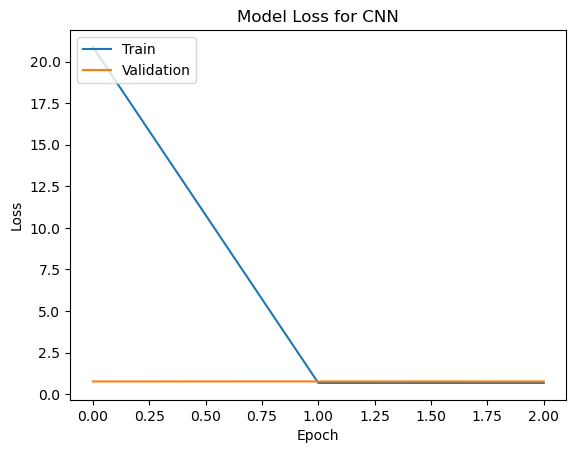

In [41]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss for CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
# initialize an empty tensor to store the labels
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
for image_batch, labels_batch in testing_images:
    labels = labels_batch
    predictions = tf.math.argmax(model.predict(image_batch), axis=-1)
    precision.update_state(labels_batch, predictions)
    recall.update_state(labels_batch, predictions)

1/1 [==============================] - 0s 307ms/step


1/1 [==============================] - 0s 344ms/step


1/1 [==============================] - 0s 254ms/step


In [43]:
print('Precision: ', precision.result().numpy())
print('Recall: ', recall.result().numpy())
f1 = 2 * (precision.result().numpy() * recall.result().numpy()) / (precision.result().numpy() + recall.result().numpy())
print('F1 Score: ', f1)

Precision:  0.65546286
Recall:  1.0
F1 Score:  0.7918786660559289


# 1.d. Transfer Learning

In [22]:
 # pre-trained models


efficient_net = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights='imagenet',
                                                                  input_shape=(299, 299, 3))

res_net = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

vgg16 = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [23]:
# freeze all layers except the last one in each model
for layer in efficient_net.layers[:-1]:
    layer.trainable = False
for layer in res_net.layers[:-1]:
    layer.trainable = False
for layer in vgg16.layers[:-1]:
    layer.trainable = False

In [24]:
batch_size_new = 8

# use ReLU activation functions in the last layer and a softmax layer, along with batch normalization 5 and a dropout rate of 30% as well as ADAM optimizer. Use cross entropy loss.
model_efficient_net = tf.keras.Sequential([
    efficient_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu', batch_size=batch_size_new),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax', batch_size=batch_size_new)

])
# set batch size to 8 and use ADAM optimizer 
model_efficient_net.compile(optimizer='adam',
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy'])

model_res_net = tf.keras.Sequential([
    res_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu', batch_size=batch_size_new),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax', batch_size=batch_size_new)
])

model_res_net.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

model_vgg16 = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu', batch_size=batch_size_new),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax', batch_size=batch_size_new)
])

model_vgg16.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [25]:
# 1.d.iv. Train using the features calculated by networks (EfficientNetB0, ResNet50, and VGG16) for at least 10 epochs (preferably 20 epochs) and perform early stopping using the validation set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.

# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


In [26]:
# train model_efficient_net
model_efficient_net.fit(training_images, epochs=10, validation_data=validation_images, verbose=1, batch_size=batch_size_new,
                        callbacks=[early_stopping])

Epoch 1/10
928/928 [==============================] - 1016s 1s/step - loss: 0.2012 - accuracy: 0.9189 - val_loss: 0.3310 - val_accuracy: 0.8391
Epoch 2/10
928/928 [==============================] - 1030s 1s/step - loss: 0.1219 - accuracy: 0.9530 - val_loss: 0.3061 - val_accuracy: 0.8771
Epoch 3/10
928/928 [==============================] - 1028s 1s/step - loss: 0.0992 - accuracy: 0.9616 - val_loss: 0.4968 - val_accuracy: 0.8325
Epoch 4/10
928/928 [==============================] - 1145s 1s/step - loss: 0.0844 - accuracy: 0.9679 - val_loss: 0.5668 - val_accuracy: 0.8361


In [27]:
model_efficient_net.save("model_efficient_net.h5")

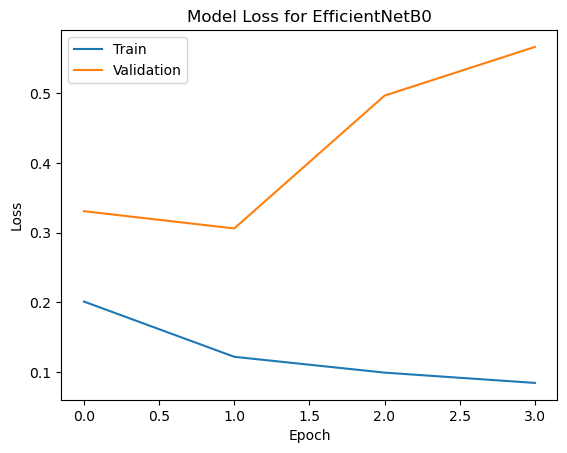

In [28]:
# plot training and validation errors vs. epochs for all three models
import matplotlib.pyplot as plt

plt.plot(model_efficient_net.history.history['loss'])
plt.plot(model_efficient_net.history.history['val_loss'])
plt.title('Model Loss for EfficientNetB0')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [29]:
# precision recall and f1 score 
precision_efficient_net = tf.keras.metrics.Precision()
recall_efficient_net = tf.keras.metrics.Recall()
for image_batch, labels_batch in testing_images:
    labels = labels_batch
    predictions_efficient_net = tf.math.argmax(model_efficient_net.predict(image_batch), axis=-1)
    precision_efficient_net.update_state(labels_batch, predictions_efficient_net)
    recall_efficient_net.update_state(labels_batch, predictions_efficient_net)

1/1 [==============================] - 1s 819ms/step


1/1 [==============================] - 1s 1s/step


In [30]:
print('Precision: ', precision_efficient_net.result().numpy())
print('Recall: ', recall_efficient_net.result().numpy())
print('F1 Score: ', 2 * (precision_efficient_net.result().numpy() * recall_efficient_net.result().numpy()) / (
            precision_efficient_net.result().numpy() + recall_efficient_net.result().numpy()))

Precision:  0.9425056
Recall:  0.94788814
F1 Score:  0.9451892106911362


In [31]:
model_res_net.fit(training_images, epochs=10, validation_data=validation_images, verbose=1, batch_size=batch_size_new,
                  callbacks=[early_stopping])

Epoch 1/10
928/928 [==============================] - 3102s 3s/step - loss: 0.1498 - accuracy: 0.9405 - val_loss: 0.2453 - val_accuracy: 0.8962
Epoch 2/10
928/928 [==============================] - 4348s 5s/step - loss: 0.0826 - accuracy: 0.9681 - val_loss: 0.3778 - val_accuracy: 0.8991
Epoch 3/10
928/928 [==============================] - 4332s 5s/step - loss: 0.0648 - accuracy: 0.9760 - val_loss: 0.4201 - val_accuracy: 0.8829


In [32]:
model_res_net.save("model_res_net.h5")

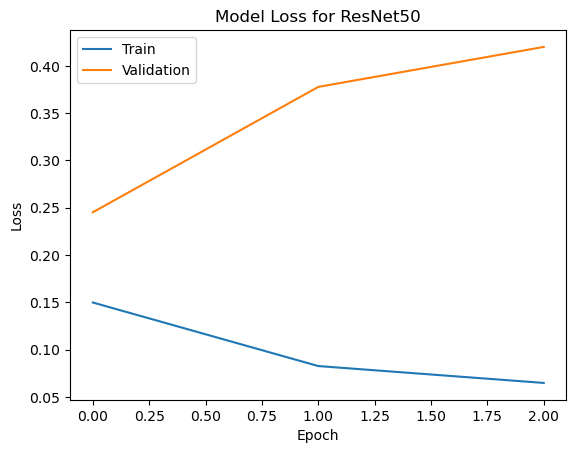

In [33]:
# plot training and validation errors vs. epochs

import matplotlib.pyplot as plt

plt.plot(model_res_net.history.history['loss'])
plt.plot(model_res_net.history.history['val_loss'])
plt.title('Model Loss for ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [34]:
# precision recall and f1 score 
precision_res_net = tf.keras.metrics.Precision()
recall_res_net = tf.keras.metrics.Recall()
for image_batch, labels_batch in testing_images:
    labels = labels_batch
    predictions_res_net = tf.math.argmax(model_res_net.predict(image_batch), axis=-1)
    precision_res_net.update_state(labels_batch, predictions_res_net)
    recall_res_net.update_state(labels_batch, predictions_res_net)

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
Precision:  0.9477475
Recall:  0.98619866
F1 Score:  0.9665908818010054


In [36]:
print('Precision: ', precision_res_net.result().numpy())
print('Recall: ', recall_res_net.result().numpy())
print('F1 Score: ', 2 * (precision_res_net.result().numpy() * recall_res_net.result().numpy()) / (
            precision_res_net.result().numpy() + recall_res_net.result().numpy()))

Precision:  0.9477475
Recall:  0.98619866
F1 Score:  0.9665908818010054


In [ ]:
model_vgg16.fit(training_images, epochs=10, validation_data=validation_images, verbose=1, batch_size=batch_size_new,
                callbacks=[early_stopping])

Epoch 1/10
928/928 [==============================] - 9033s 10s/step - loss: 0.1708 - accuracy: 0.9374 - val_loss: 0.4359 - val_accuracy: 0.8191
Epoch 2/10
928/928 [==============================] - 9051s 10s/step - loss: 0.0957 - accuracy: 0.9657 - val_loss: 0.3369 - val_accuracy: 0.8718
Epoch 3/10
928/928 [==============================] - 11595s 12s/step - loss: 0.0753 - accuracy: 0.9727 - val_loss: 0.5433 - val_accuracy: 0.8388
Epoch 4/10
928/928 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9750

In [ ]:
model_vgg16.save("model_vgg16.h5")

In [ ]:
plt.plot(model_vgg16.history.history['loss'])
plt.plot(model_vgg16.history.history['val_loss'])
plt.title('Model Loss for VGG16')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
precision_vgg16 = tf.keras.metrics.Precision()
recall_vgg16 = tf.keras.metrics.Recall()
for image_batch, labels_batch in testing_images:
    labels = labels_batch
    predictions_vgg16 = tf.math.argmax(model_vgg16.predict(image_batch), axis=-1)
    precision_vgg16.update_state(labels_batch, predictions_vgg16)
    recall_vgg16.update_state(labels_batch, predictions_vgg16)

In [ ]:
print('Precision for VGG16: ', precision_vgg16.result().numpy())
print('Recall for VGG16: ', recall_vgg16.result().numpy())
print('F1 Score for VGG16: ', 2 * (precision_vgg16.result().numpy() * recall_vgg16.result().numpy()) / (
        precision_vgg16.result().numpy() + recall_vgg16.result().numpy()))

## On comparing the results of transfer learning with that of CNN+MLP models, we can see that the transfer learning models perform significantly better than the CNN +MLP models. Reason for than can be:

## Pre-trained features: 
Pre-trained models have already learned useful representations of features from large datasets, which can be directly applied to your task. This can significantly reduce the amount of training data needed for your specific problem.

## Regularization: 
Fine-tuning pre-trained models can act as a form of regularization, which helps to prevent overfitting and improve the generalization ability of your model.
